# 1. Data Exploratory
- Null / Duplicated / Outlier / Imbalance / Distribution

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://raw.githubusercontent.com/Bolympus1/DADS7202/main/diabetes_binary_health_indicators_BRFSS2015.csv'

df = pd.read_csv(url,sep=",")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
pd.set_option("max_colwidth", None)
pd.set_option('display.max_columns', None)

In [ ]:
df.info()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# Null value
    
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
# Duplicate item

print( "Before :", df.shape )
print( "After :", df.drop_duplicates().shape )
print( "Duplicate Rows : ", df.shape[0] - df.drop_duplicates().shape[0] )


Before : (253680, 22)
After : (229474, 22)
Duplicate Rows :  24206


In [ ]:
# Duplicate item

df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  

In [ ]:
# Unique value

df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [ ]:
# Outlier

df.describe().T[ ["min", "25%", "50%", "75%", "max"] ]

,min,25%,50%,75%,max
Diabetes_binary,0.0,0.0,0.0,0.0,1.0
HighBP,0.0,0.0,0.0,1.0,1.0
HighChol,0.0,0.0,0.0,1.0,1.0
CholCheck,0.0,1.0,1.0,1.0,1.0
BMI,12.0,24.0,27.0,32.0,98.0
Smoker,0.0,0.0,0.0,1.0,1.0
Stroke,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,1.0
PhysActivity,0.0,0.0,1.0,1.0,1.0
Fruits,0.0,0.0,1.0,1.0,1.0


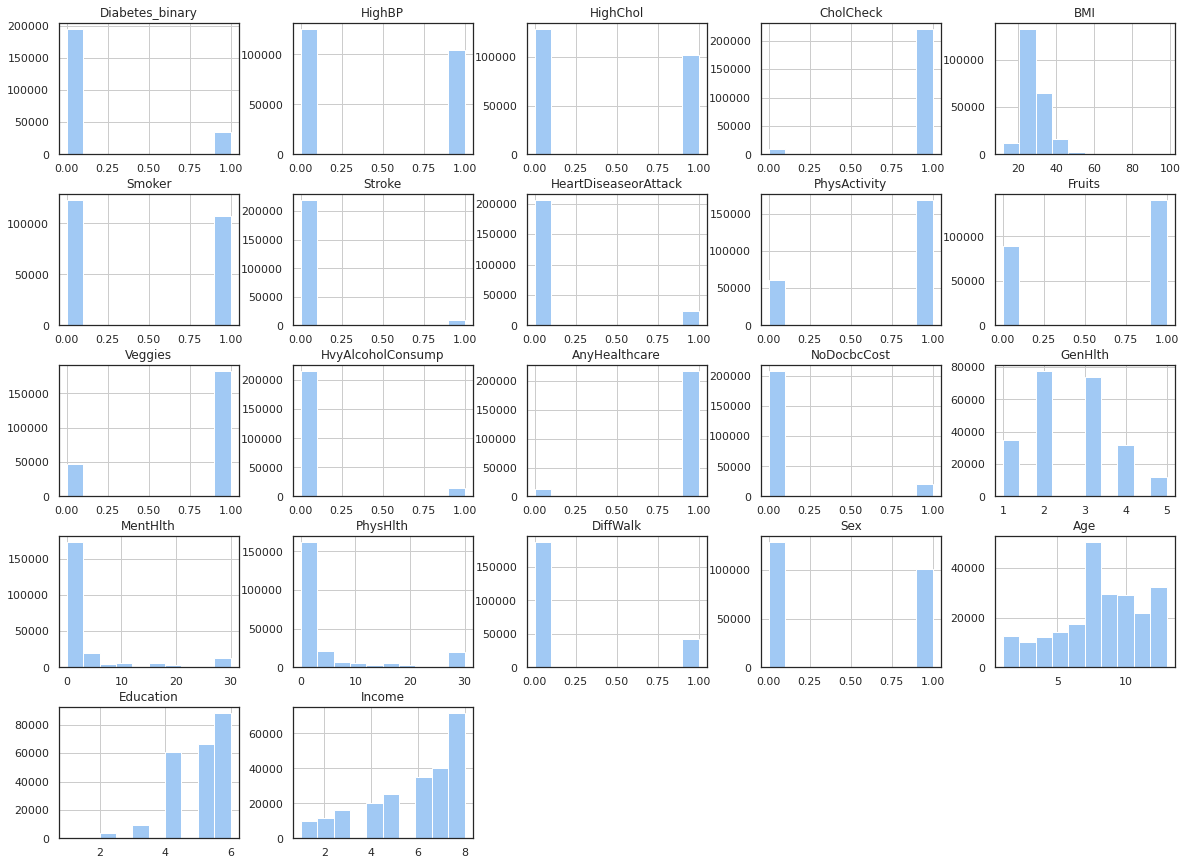

In [ ]:
# Histrogram
sns.set_theme(style="white",palette="pastel")
df.hist(figsize=(20,15));

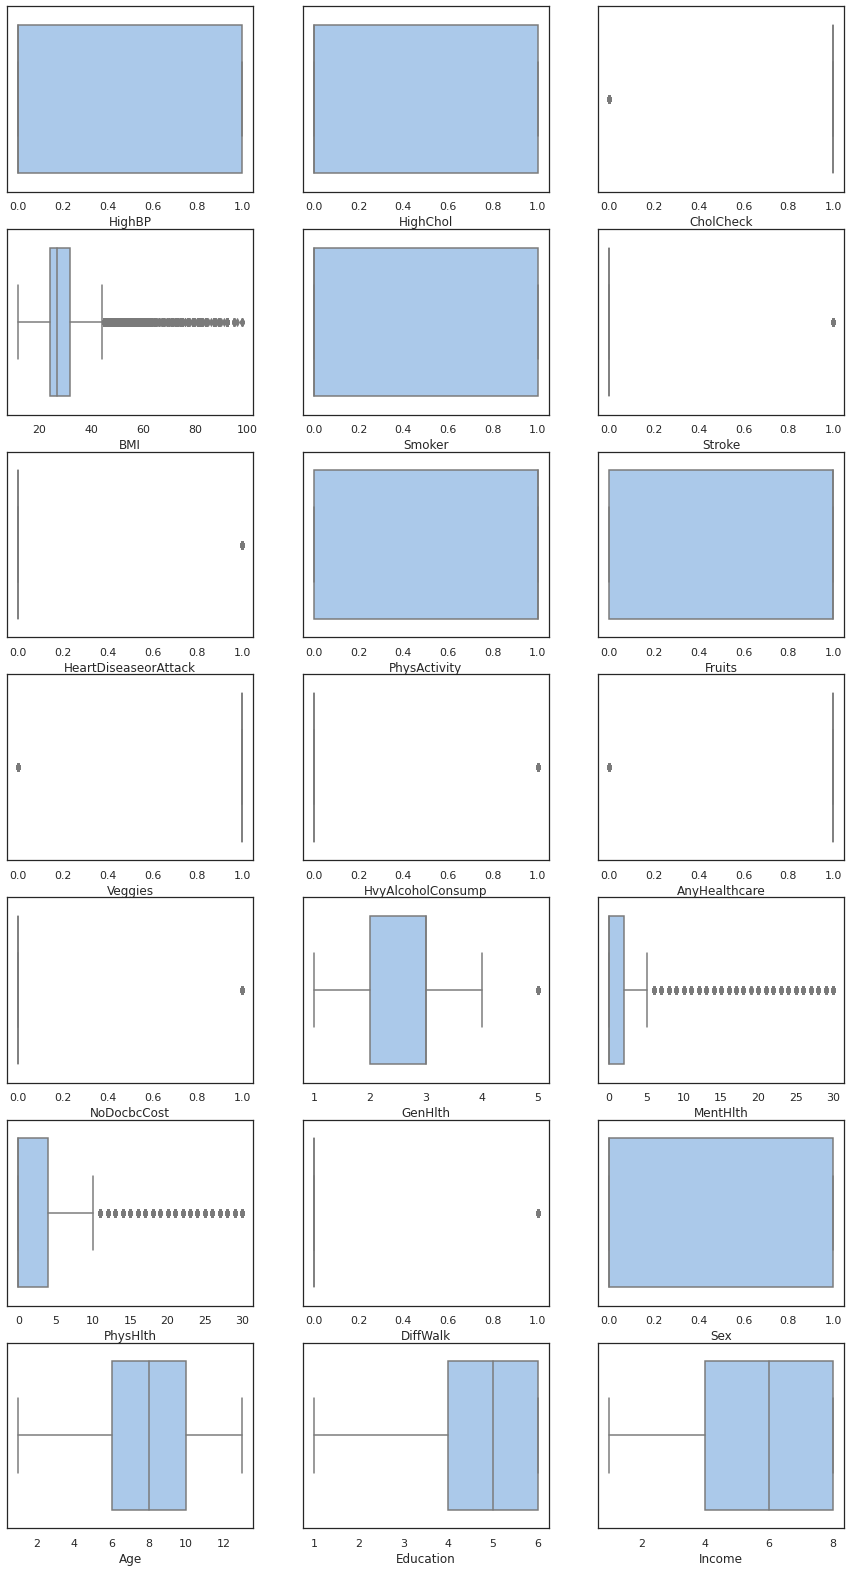

In [ ]:
# Boxplot
#plt.style.use('seaborn-darkgrid')
#for i in df.columns:
#    print("plot", i)
#    fig, ax = plt.subplots(figsize=(20,1))
#    ax.boxplot(df[i],vert=False)
#    plt.show()

plt.figure(figsize = (15,28))
for i,col in enumerate(df.loc[:,df.columns != 'Diabetes_binary']):
  plt.subplot(7,3,i+1)
  sns.boxplot(x = col, data = df)

plt.show()

1    206326
0    130996
Name: Diabetes_binary, dtype: int64


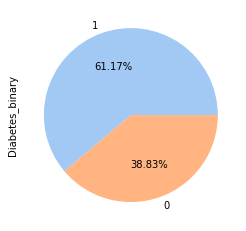

In [ ]:
# Imbalance data
colors = sns.color_palette('pastel')[0:5]
df['Diabetes_binary'].value_counts().plot.pie(colors = colors,autopct='%.2f%%')
print( df['Diabetes_binary'].value_counts() )

# 2. Handle Outlier
- IQR method

In [ ]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [ ]:
#lst = ["BMI", "MentHlth", "PhysHlth", "GenHlth"]
lst = ["BMI"]

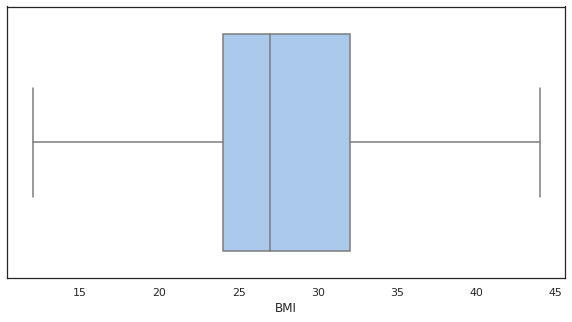

In [ ]:
import warnings
lowerbound,upperbound = outlier_treatment(df["BMI"])
df["BMI"] = np.where(df["BMI"]>upperbound,
                     upperbound,
                     np.where(df["BMI"]<lowerbound, lowerbound, df["BMI"]))

warnings.filterwarnings('ignore')
plt.figure(figsize = (10,5))    
sns.boxplot(df["BMI"])
plt.show()

# 3. Handle Normalize

In [ ]:
x = df[['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies',
'HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']]
y = df['Diabetes_binary']

In [ ]:
scaled_features = df.copy()
col_names = [i for i in x]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)


scaled_features[col_names] = features
scaled_features.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.095892,1.124404,0.205499,1.959035,1.070908,-0.216606,-0.339478,-1.657077,-1.257701,0.508445,-0.254413,0.238893,-0.320063,2.251897,1.877538,1.140089,2.093694,-0.884764,0.295669,-0.986660,-1.380208
1,0.0,-0.912499,-0.889360,-4.866203,-0.589457,1.070908,-0.216606,-0.339478,0.603472,-1.257701,-1.966783,-0.254413,-4.185976,3.124389,0.373892,-0.454786,-0.517213,-0.477625,-0.884764,-0.350650,1.027465,-2.335828
2,0.0,1.095892,1.124404,0.205499,-0.079759,-0.933787,-0.216606,-0.339478,-1.657077,0.795102,-1.966783,-0.254413,0.238893,3.124389,2.251897,3.432420,2.797390,2.093694,-0.884764,0.295669,-0.986660,1.008840
3,0.0,1.095892,-0.889360,0.205499,-0.249658,-0.933787,-0.216606,-0.339478,0.603472,0.795102,0.508445,-0.254413,0.238893,-0.320063,-0.565110,-0.454786,-0.517213,-0.477625,-0.884764,0.941989,-1.993722,0.053221
4,0.0,1.095892,1.124404,0.205499,-0.759357,-0.933787,-0.216606,-0.339478,0.603472,0.795102,0.508445,-0.254413,0.238893,-0.320063,-0.565110,-0.066065,-0.517213,-0.477625,-0.884764,0.941989,0.020402,-0.902399


In [ ]:
df = scaled_features
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.095892,1.124404,0.205499,1.959035,1.070908,-0.216606,-0.339478,-1.657077,-1.257701,0.508445,-0.254413,0.238893,-0.320063,2.251897,1.877538,1.140089,2.093694,-0.884764,0.295669,-0.986660,-1.380208
1,0.0,-0.912499,-0.889360,-4.866203,-0.589457,1.070908,-0.216606,-0.339478,0.603472,-1.257701,-1.966783,-0.254413,-4.185976,3.124389,0.373892,-0.454786,-0.517213,-0.477625,-0.884764,-0.350650,1.027465,-2.335828
2,0.0,1.095892,1.124404,0.205499,-0.079759,-0.933787,-0.216606,-0.339478,-1.657077,0.795102,-1.966783,-0.254413,0.238893,3.124389,2.251897,3.432420,2.797390,2.093694,-0.884764,0.295669,-0.986660,1.008840
3,0.0,1.095892,-0.889360,0.205499,-0.249658,-0.933787,-0.216606,-0.339478,0.603472,0.795102,0.508445,-0.254413,0.238893,-0.320063,-0.565110,-0.454786,-0.517213,-0.477625,-0.884764,0.941989,-1.993722,0.053221
4,0.0,1.095892,1.124404,0.205499,-0.759357,-0.933787,-0.216606,-0.339478,0.603472,0.795102,0.508445,-0.254413,0.238893,-0.320063,-0.565110,-0.066065,-0.517213,-0.477625,-0.884764,0.941989,0.020402,-0.902399


#4. Imbalance

In [ ]:
X = df.loc[:,df.columns != 'Diabetes_binary']
y = df['Diabetes_binary']
print( X.columns )
print( X.shape )


Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
(229474, 21)


In [ ]:
## SMOTEENN
## Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours.

from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [ ]:
df_resampled = pd.concat([pd.DataFrame(y_resampled), pd.DataFrame(X_resampled)], axis=1)

1.0    168329
0.0    121869
Name: Diabetes_binary, dtype: int64


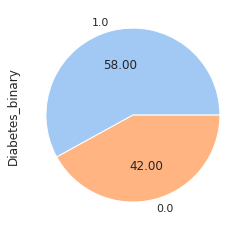

In [ ]:
df_resampled['Diabetes_binary'].value_counts().plot.pie(autopct='%.2f')
print(df_resampled['Diabetes_binary'].value_counts()) # 290,010

In [ ]:
df = df_resampled

In [ ]:
df.to_csv('data_imbalance.csv', index=False)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.095892,1.124404,0.205499,-0.759357,-0.933787,-0.216606,-0.339478,0.603472,0.795102,0.508445,-0.254413,0.238893,-0.320063,-0.565110,-0.066065,-0.517213,-0.477625,-0.884764,0.941989,0.020402,-0.902399
1,0.0,1.095892,1.124404,0.205499,-0.589457,1.070908,-0.216606,-0.339478,0.603472,0.795102,0.508445,-0.254413,0.238893,-0.320063,-0.565110,-0.454786,-0.296239,-0.477625,1.130245,0.618829,1.027465,1.008840
2,0.0,1.095892,-0.889360,0.205499,0.260040,1.070908,-0.216606,-0.339478,-1.657077,-1.257701,-1.966783,-0.254413,0.238893,-0.320063,0.373892,-0.454786,1.029602,-0.477625,-0.884764,0.295669,1.027465,0.531031
3,0.0,1.095892,1.124404,0.205499,-0.589457,1.070908,-0.216606,-0.339478,0.603472,-1.257701,0.508445,-0.254413,0.238893,-0.320063,0.373892,-0.454786,-0.517213,2.093694,-0.884764,0.941989,-0.986660,-0.902399
4,0.0,-0.912499,-0.889360,0.205499,-0.759357,-0.933787,-0.216606,-0.339478,-1.657077,-1.257701,0.508445,-0.254413,0.238893,-0.320063,-0.565110,-0.454786,-0.517213,-0.477625,1.130245,-0.027491,-0.986660,-1.380208




```
# This is formatted as code
```

#5. Feature Selection (*Pass*)

In [ ]:
#x = df[['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies',
#'HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']]
#y = df['Diabetes_binary']

In [ ]:
# Feature extraction
#model = DecisionTreeClassifier()
#rfe = RFE(model)
#fit = rfe.fit(x, y)
#print("Num Features: %s" % (fit.n_features_))
#print("Selected Features: %s" % (fit.support_))
#print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 10
Selected Features: [ True  True False  True False False False False False False False False
 False  True  True  True False  True  True  True  True]
Feature Ranking: [ 1  1 12  1  3 10  6  4  2  5  8 11  9  1  1  1  7  1  1  1  1]


In [ ]:
#print('Selected Features: %s' % list(x.columns[rfe.support_]))

Selected Features: ['HighBP', 'HighChol', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income']


In [ ]:
#new_x = []
#Selected_Features = fit.support_
#for i, m in zip(x, Selected_Features):
#    if m == True:
#        new_x.append(i)

#new_x

['HighBP',
 'HighChol',
 'BMI',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'Sex',
 'Age',
 'Education',
 'Income']

In [ ]:
#xnew = df[new_x]
#ynew = y
#df = pd.concat([ynew, xnew], axis=1)
#df

,Diabetes_binary,HighBP,HighChol,BMI,GenHlth,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0,0.0,0.000000,25.00000,3.000000,0.000000,0.0,0.000000,7.000000,6.000000,1.000000
1,0,1.0,1.000000,25.00000,2.000000,0.000000,2.0,1.000000,10.000000,6.000000,8.000000
2,0,1.0,0.000000,30.00000,3.000000,0.000000,14.0,0.000000,9.000000,6.000000,7.000000
3,0,0.0,0.000000,24.00000,2.000000,0.000000,0.0,1.000000,8.000000,4.000000,3.000000
4,0,1.0,0.000000,33.00000,2.000000,5.000000,0.0,0.000000,6.000000,6.000000,8.000000
...,...,...,...,...,...,...,...,...,...,...,...
337317,1,1.0,0.997471,47.00000,2.002529,0.002529,3.0,0.000000,8.994942,5.002529,8.000000
337318,1,1.0,1.000000,31.00000,5.000000,0.000000,30.0,1.000000,8.983799,4.016201,1.000000
337319,1,1.0,0.687410,28.68741,3.000000,0.000000,0.0,1.000000,8.000000,1.625181,1.000000
337320,1,1.0,0.668034,27.00000,3.000000,5.000000,0.0,0.331966,10.000000,5.331966,6.000000


#6. Split
- 80/20
- 70/30

In [ ]:
x = df.loc[:,df.columns != 'Diabetes_binary']
y = df['Diabetes_binary']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print( x.columns )
print( x.shape )

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
(337322, 21)


In [ ]:
y.value_counts()

1    206326
0    130996
Name: Diabetes_binary, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=35) #80/20

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((269857, 21), (269857,), (67465, 21), (67465,))

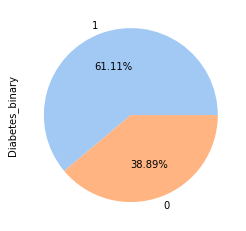

In [ ]:
y_train.value_counts().plot.pie(colors = colors,autopct='%.2f%%') #Training data

In [ ]:
y_train.value_counts()

1    164901
0    104956
Name: Diabetes_binary, dtype: int64

# 7. Build

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time

start_time = time.time()
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train, y_train)

end_time = time.time()
print('Duration: {}'.format(end_time - start_time))

Duration: 0.03862571716308594


In [ ]:
# Make prediction
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [ ]:
# Training Cross-validation Models
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer,f1_score, matthews_corrcoef

model_cv = KNeighborsClassifier(n_neighbors=2)
cv = cross_val_score(model_cv, x_train, y_train, cv=5, scoring=make_scorer(f1_score,average="weighted"))

#8. Validation

In [ ]:
f1_cv = cv.mean()
f1_train = f1_score(y_train, y_train_pred, average="weighted")
f1_test = f1_score(y_test, y_test_pred, average="weighted")

#display
name = ["Train_set", "CV_set", "Test_set"]
value = [f1_train, f1_cv, f1_test]
df_result = pd.DataFrame(list(zip(name, value)),
                  columns =['Name', 'f1_score']
                 )
df_result

,Name,f1_score
0,Train_set,0.999492
1,CV_set,0.980120
2,Test_set,0.986659


In [ ]:
from sklearn.metrics import classification_report
from sklearn import linear_model
from scipy.special import expit

print( classification_report(y_test, y_test_pred,digits=4) )

              precision    recall  f1-score   support

           0     0.9944    0.9710    0.9826     26040
           1     0.9820    0.9965    0.9892     41425

    accuracy                         0.9867     67465
   macro avg     0.9882    0.9838    0.9859     67465
weighted avg     0.9868    0.9867    0.9867     67465



In [ ]:
df_result.to_excel("result_Hist.xlsx")